In [1]:
%matplotlib inline
import os
os.chdir("/home/ubuntu/")

import utils; reload(utils)
from utils import *
from vgg16 import Vgg16
print "custom libraries loaded from local files"

#adding utility libraries
import os
import sys
import random
import time
import pip
import shutil
print ("utility libraries loaded.")

import numpy as np
import pandas as pd
print ("ML/Sci libraries loaded.")


Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


custom libraries loaded from local files
utility libraries loaded.
ML/Sci libraries loaded.


In [2]:
#set home directory for this project
path = "/home/ubuntu/kaggleDogId/"
trainDir = "train/"
testDir = "test/"
verifyDir = "verify/"
print "parameters loaded."

parameters loaded.


In [3]:
os.chdir(path)
print "current dir:", os.getcwd()


current dir: /home/ubuntu/kaggleDogId


In [4]:
#get list of breeds and sort alphabetically.
#could also get this list from labels.csv & select distinct.
breeds = []
for directories in os.listdir(path+verifyDir): 
    #print directories
    breeds.append(directories)
breeds = sorted(breeds)
#breeds

In [5]:
vgg = Vgg16()
batch_size = 64

In [6]:
vgg.model.load_weights(path+'dog_breed_results_3_10epoch_lr=p001.h5')

In [7]:
val_batches, probs = vgg.test(verifyDir, batch_size = batch_size)

Found 2001 images belonging to 120 classes.


In [16]:
#convert probs into breeds. identify highest probability for each row, record column number, breed and the highest probability.probsBreedprobsBreed = []
probsBreed = []
for i in range(0,probs.shape[0]):
    col = np.argmax(probs[i,:])
    probsBreed.append([col, probs[i,col], breeds[col]])
probsBreed = np.asarray(probsBreed)
print probsBreed.shape
probsBreed[0:10, :]

(2001, 3)


array([['0', '0.964381', 'affenpinscher'],
       ['97', '0.985154', 'scottish_deerhound'],
       ['0', '0.99919', 'affenpinscher'],
       ['0', '0.9462', 'affenpinscher'],
       ['0', '1.0', 'affenpinscher'],
       ['0', '0.704936', 'affenpinscher'],
       ['0', '1.0', 'affenpinscher'],
       ['0', '1.0', 'affenpinscher'],
       ['0', '1.0', 'affenpinscher'],
       ['76', '0.476376', 'miniature_poodle']], 
      dtype='|S32')

In [14]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1
print "filenames:", type(filenames), len(filenames)
print "expected_labels:", type(expected_labels), expected_labels.shape
print "expected_labels unique values:", np.unique(expected_labels)
print "probs:", type(probs), probs.shape
print "type(val_batches):", type(val_batches)
print "\nexpected_labels[0:10]", expected_labels[0:10]
print "\nfilenames[0:10]:", filenames[0:10]

filenames: <type 'list'> 2001
expected_labels: <type 'numpy.ndarray'> (2001,)
expected_labels unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119]
probs: <type 'numpy.ndarray'> (2001, 120)
type(val_batches): <class 'keras.preprocessing.image.DirectoryIterator'>

expected_labels[0:10] [0 0 0 0 0 0 0 0 0 0]

filenames[0:10]: ['affenpinscher/c32fb0c78bfc35f176ae7090155ef2c9.jpg', 'affenpinscher/0162107acd8f2588c0944b791d61bb0c.jpg', 'affenpinscher/4cb48a54b94e4c7dcf9798f7cc7f5a92.jpg', 'affenpinscher/19de1db12b3ddc7f2af6d9453c977083.jpg', 'affenpins

In [10]:
#Round our predictions to 0/1 to generate labels

#our_predictions = probs[:,0]#fix this to get breed - hightest prob.
#select first column - this code is for dogs/cats. different for multiple classifications 
#nb: directory name 'affenpinscher' is the first in alphabetical order.

#our_labels = np.round(1-our_predictions)
#round values to 0 or 1
#print "our_predictions:", type(our_predictions), our_predictions.shape
#print "our_labels:", type(our_labels), our_labels.shape
#print "our_predictions[0:10]:", our_predictions[0:10]
#print "our_labels[0:10]:", our_labels[0:10]

our_predictions: <type 'numpy.ndarray'> (2001,)
our_labels: <type 'numpy.ndarray'> (2001,)
[  9.6438e-01   4.4445e-05   9.9919e-01   9.4620e-01   1.0000e+00   7.0494e-01   1.0000e+00
   1.0000e+00   1.0000e+00   9.7835e-02]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  1.]


In [11]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(verifyDir + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

In [64]:
#identify correct category predictions
correct = []
incorrect = []
for i in range(0, probsBreed.shape[0]):
    print i, probsBreed[i, 0], ", ", expected_labels[i]
    if int(probsBreed[i, 0]) == int(expected_labels[i]):
        correct.append(i)
    if int(probsBreed[i, 0]) != int(expected_labels[i]):
        incorrect.append(i)
print correct
print len(correct)
print incorrect
print len(incorrect)
print len(correct) + len(incorrect)

0 0 ,  0
1 97 ,  0
2 0 ,  0
3 0 ,  0
4 0 ,  0
5 0 ,  0
6 0 ,  0
7 0 ,  0
8 0 ,  0
9 76 ,  0
10 0 ,  0
11 0 ,  0
12 0 ,  0
13 0 ,  0
14 0 ,  0
15 68 ,  0
16 1 ,  1
17 64 ,  1
18 97 ,  1
19 1 ,  1
20 1 ,  1
21 1 ,  1
22 1 ,  1
23 1 ,  1
24 1 ,  1
25 1 ,  1
26 1 ,  1
27 1 ,  1
28 1 ,  1
29 1 ,  1
30 1 ,  1
31 1 ,  1
32 1 ,  1
33 1 ,  1
34 1 ,  1
35 1 ,  1
36 1 ,  1
37 1 ,  1
38 1 ,  1
39 2 ,  2
40 2 ,  2
41 2 ,  2
42 2 ,  2
43 2 ,  2
44 2 ,  2
45 2 ,  2
46 2 ,  2
47 2 ,  2
48 2 ,  2
49 2 ,  2
50 2 ,  2
51 2 ,  2
52 2 ,  2
53 2 ,  2
54 2 ,  2
55 2 ,  2
56 3 ,  3
57 3 ,  3
58 3 ,  3
59 3 ,  3
60 83 ,  3
61 68 ,  3
62 3 ,  3
63 3 ,  3
64 3 ,  3
65 3 ,  3
66 3 ,  3
67 3 ,  3
68 3 ,  3
69 79 ,  3
70 3 ,  3
71 3 ,  3
72 3 ,  3
73 3 ,  3
74 3 ,  3
75 3 ,  3
76 3 ,  3
77 14 ,  4
78 4 ,  4
79 4 ,  4
80 25 ,  4
81 117 ,  4
82 4 ,  4
83 4 ,  4
84 4 ,  4
85 22 ,  4
86 4 ,  4
87 4 ,  4
88 104 ,  4
89 4 ,  4
90 25 ,  4
91 9 ,  5
92 11 ,  5
93 53 ,  5
94 5 ,  5
95 91 ,  5
96 5 ,  5
97 38 ,  5
98 5 ,  5


Found 1463 correct labels
57 irish_terrier 0.995954 irish_terrier
39 english_foxhound 1.0 english_foxhound
6 australian_terrier 1.0 australian_terrier
44 flat-coated_retriever 0.999608 flat-coated_retriever


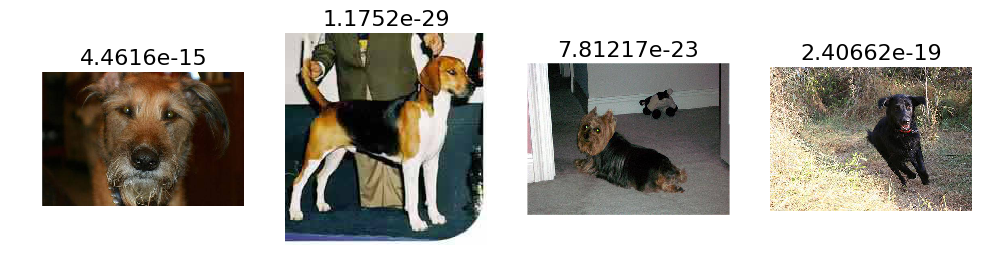

In [65]:
#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html
#    

#1. A few correct labels at random

print "Found %d correct labels" % len(correct)
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])
#NB : eliminate photo with humans?? these seems to be ok.
#NBB: eliminate photos with more than one dog.
#NBB: check if any predictions are low probability ie: cannot identify which breed of dog due to poor photo.
#https://en.wikipedia.org/wiki/Affenpinscher
for i in range(0,idx.shape[0]):
    print np.argmax(probs[idx[i],:]), breeds[np.argmax(probs[idx[i],:])], max(probs[idx[i],:]), breeds[expected_labels[idx[i]]]

Found 538 incorrect labels
index, predicted breed, prob of prediced breed, filename.
71 malamute 0.999434 siberian_husky/77b43f8c92647abe6025d4972dd899cf.jpg
115 welsh_springer_spaniel 0.797213 blenheim_spaniel/c52852b1d9ab94c9ebb948c38dfd1bf3.jpg
37 dingo 0.992945 dhole/363cfbe14575417ee342c93d1864f727.jpg
113 walker_hound 0.890946 beagle/7bea6cd93e219ca2419f999001ecb27a.jpg


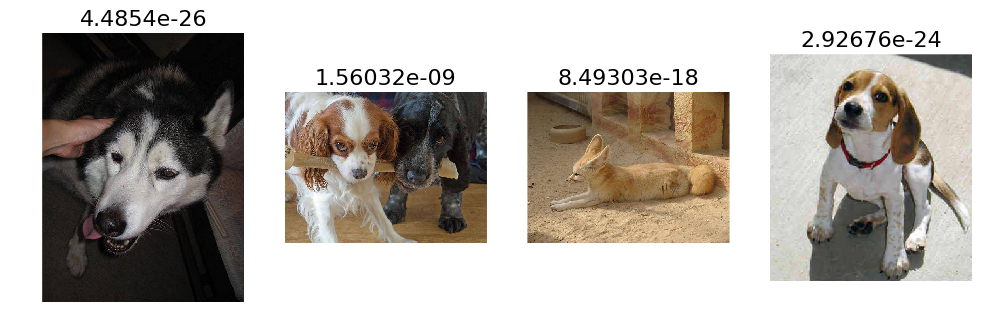

In [75]:
#2. A few incorrect labels at random
print "Found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])
print "index, predicted breed, prob of prediced breed, filename."
for i in range(0,idx.shape[0]):
    print   np.argmax(probs[idx[i],:]), breeds[np.argmax(probs[idx[i],:])], max(probs[idx[i],:]), filenames[idx[i]]
            #breeds[expected_labels[idx[i]]], 

In [82]:
#idx = permutation(incorrect)[:n_view]
mismatchCounter = {}
for i in incorrect:
    print   np.argmax(probs[i,:]), breeds[np.argmax(probs[i,:])], max(probs[i,:]), breeds[expected_labels[i]], filenames[i]
    mismatch = breeds[np.argmax(probs[i,:])]+"/"+breeds[expected_labels[i]]
    if mismatch in mismatchCounter:
        mismatchCounter[mismatch] += 1
    else:
        mismatchCounter[mismatch] = 1

    

97 scottish_deerhound 0.985154 affenpinscher affenpinscher/0162107acd8f2588c0944b791d61bb0c.jpg
76 miniature_poodle 0.476376 affenpinscher affenpinscher/cf44ff5245f6b6c1ea2ad82930bfb237.jpg
68 lakeland_terrier 0.482696 affenpinscher affenpinscher/e3eb50726f2104cbf86db02d443e04be.jpg
64 kerry_blue_terrier 0.91046 afghan_hound afghan_hound/5e11c37793026888dca3bbc8b40f3315.jpg
97 scottish_deerhound 0.548689 afghan_hound afghan_hound/a2d1737311988806e991f908de9fb088.jpg
83 otterhound 0.999681 airedale airedale/aa94045f0221be29ee6508361b4913fc.jpg
68 lakeland_terrier 0.920682 airedale airedale/491e4b8fc7676f9dfb6b4858790cc077.jpg
79 norfolk_terrier 0.447079 airedale airedale/34455076d8d7c9e83eed6cfde1e29670.jpg
14 bloodhound 0.746192 american_staffordshire_terrier american_staffordshire_terrier/6c1e8f1f68a9e22c95a1ce59a7fa3fdf.jpg
25 bull_mastiff 0.826783 american_staffordshire_terrier american_staffordshire_terrier/f6d25f988a2c379fe7c7ffc52fc39035.jpg
117 whippet 0.977702 american_stafford

In [85]:
sorted(mismatchCounter.items(), key=lambda item: item[1], reverse=True)

[('miniature_poodle/toy_poodle', 9),
 ('walker_hound/english_foxhound', 8),
 ('norwich_terrier/norfolk_terrier', 8),
 ('siberian_husky/eskimo_dog', 5),
 ('malamute/siberian_husky', 5),
 ('bloodhound/rhodesian_ridgeback', 5),
 ('walker_hound/beagle', 5),
 ('newfoundland/flat-coated_retriever', 4),
 ('collie/shetland_sheepdog', 4),
 ('appenzeller/entlebucher', 4),
 ('miniature_poodle/standard_poodle', 4),
 ('american_staffordshire_terrier/staffordshire_bullterrier', 4),
 ('pekinese/shih-tzu', 4),
 ('basset/walker_hound', 3),
 ('rottweiler/black-and-tan_coonhound', 3),
 ('airedale/lakeland_terrier', 3),
 ('bloodhound/redbone', 3),
 ('eskimo_dog/siberian_husky', 3),
 ('lhasa/tibetan_terrier', 3),
 ('scottish_deerhound/irish_wolfhound', 3),
 ('collie/border_collie', 3),
 ('giant_schnauzer/schipperke', 3),
 ('newfoundland/tibetan_mastiff', 3),
 ('lhasa/shih-tzu', 3),
 ('pug/french_bulldog', 3),
 ('appenzeller/greater_swiss_mountain_dog', 3),
 ('yorkshire_terrier/silky_terrier', 3),
 ('malino